# Caso de Estudio N°1

1- El problema que se presenta es la disminución de la efectividad de las campañas de marketing de una institución financiera en los últimos 6 meses, lo cual ha llevado a que el indicador de efectividad caiga del 12% al 8%. El objetivo de negocio es aumentar la efectividad de las futuras campañas de marketing.

2- En el problema de negocio se utilizan las siguientes variables:

 - Variables demográficas: age (edad), job (trabajo), marital (estado civil), education (nivel educativo).
- Variables relacionadas con la situación financiera: default (crédito en mora), housing (crédito hipotecario), loan (crédito personal).
- Variables de contacto y campaña: contact (canal de comunicación), month (último mes de contacto), day_of_week (último día de la semana de contacto), duration (duración de la llamada), campaign (número de contactos en la campaña actual), pdays (días desde la última gestión en campañas), previous (número de contactos antes de la campaña actual), poutcome (tipificación de aceptación en campaña anterior).
- Variables económicas: emp.var.rate (tasa de variación del empleo), cons.price.idx (índice de precios al consumidor), cons.conf.idx (índice de confianza al consumidor), euribor3m (ratio de tipo de cambio medio en los últimos 3 meses), nr.employed (número de empleados).

3- Para resolver este problema de negocio y cumplir con los objetivos planteados, se puede utilizar la ciencia o analítica de datos de la siguiente manera:

a) Realizar un análisis exploratorio de datos: Se debe realizar un análisis detallado de los datos disponibles en el dataset BankMarketing.csv. Esto incluye comprender la distribución de las variables, identificar posibles relaciones o patrones entre las variables y analizar la tendencia de la efectividad en función de diferentes características.

b) Identificar variables relevantes: Mediante técnicas de análisis estadístico y visualización de datos, es importante identificar las variables que tienen una mayor influencia en la efectividad de las campañas de marketing. Esto permitirá enfocar los esfuerzos en aquellas variables que tienen un impacto significativo.

c) Modelado predictivo: Se pueden utilizar técnicas de aprendizaje automático (machine learning) para construir modelos predictivos que ayuden a predecir la efectividad de las campañas de marketing. Estos modelos pueden utilizar las variables disponibles para realizar predicciones y brindar información sobre las estrategias más efectivas.

d) Segmentar clientes: Es posible realizar una segmentación de clientes basada en diferentes características demográficas, financieras y de contacto. Esto ayudará a identificar grupos de clientes con características similares que puedan tener comportamientos de respuesta similares ante las campañas de marketing.

e) Optimizar estrategias: Utilizando los resultados del análisis y los modelos predictivos, se pueden desarrollar estrategias personalizadas para diferentes segmentos de clientes. Estas estrategias pueden incluir el ajuste de los canales de comunicación, la frecuencia de contacto, el contenido de las ofertas y la selección de momentos óptimos para realizar las campañas.

f) Evaluación y mejora continua: Es importante evaluar regularmente los resultados de las campañas de marketing y ajustar las estrategias según sea necesario. Esto implica realizar un seguimiento de los indicadores de efectividad, realizar análisis de retorno de inversión (ROI) y recopilar comentarios de los clientes para mejorar continuamente las campañas futuras.

## Importamos librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Cargamos nuestro dataset

In [2]:
df = pd.read_csv(
    "D://Coderhouse//10. Estudios de Casos de Modelos Analíticos//CSVs Casos//BankMarketing.csv",
    sep=";",
)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Preprocesamos la información

In [3]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()

    new_df["job"] = le.fit_transform(new_df["job"])
    new_df["marital"] = le.fit_transform(new_df["marital"])
    new_df["education"] = le.fit_transform(new_df["education"])
    new_df["default"] = le.fit_transform(new_df["default"])
    new_df["housing"] = le.fit_transform(new_df["housing"])
    new_df["month"] = le.fit_transform(new_df["month"])
    new_df["loan"] = le.fit_transform(new_df["loan"])
    new_df["contact"] = le.fit_transform(new_df["contact"])
    new_df["day_of_week"] = le.fit_transform(new_df["day_of_week"])
    new_df["poutcome"] = le.fit_transform(new_df["poutcome"])
    new_df["y"] = le.fit_transform(new_df["y"])
    return new_df

In [4]:
# Reemplazamos "basic.6y", "basic.4y", "basic.9y" por solo "basic":
df.replace(["basic.6y", "basic.4y", "basic.9y"], "basic", inplace=True)

## Verificamos valores nulos

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Visualización

<Axes: xlabel='count', ylabel='job'>

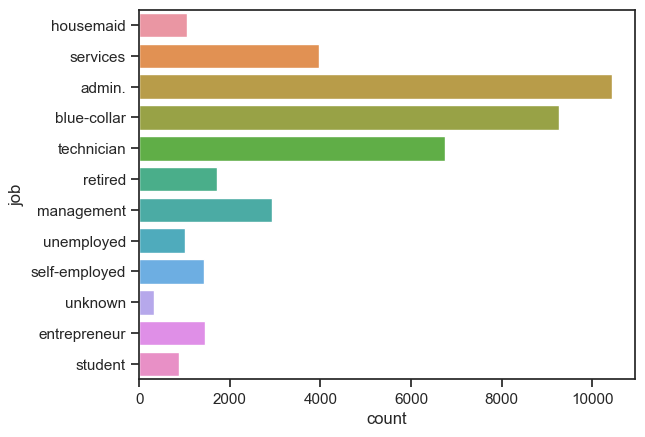

In [6]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y="job", data=df)

In [7]:
# Descartamos los valoers 'unknown':
# df = df[df.job != "unknown"]

<Axes: xlabel='count', ylabel='marital'>

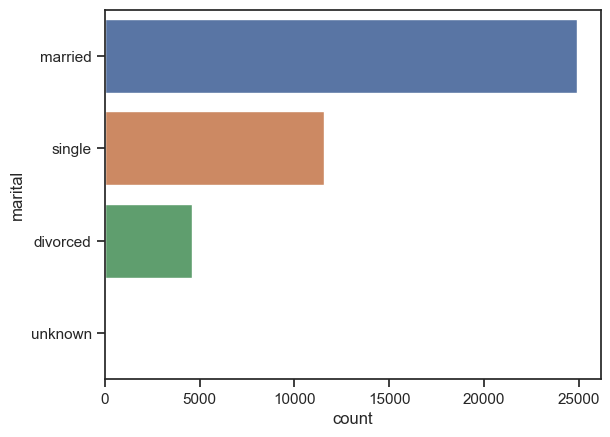

In [8]:
# Graficamos estados civiles:
sns.countplot(y="marital", data=df)

In [9]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [10]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [11]:
# Eliminamos valores 'unknown' de las columnas 'marital' y 'loan':
df = df[df.marital != "unknown"]
df = df[df.loan != "unknown"]

<Axes: xlabel='count', ylabel='education'>

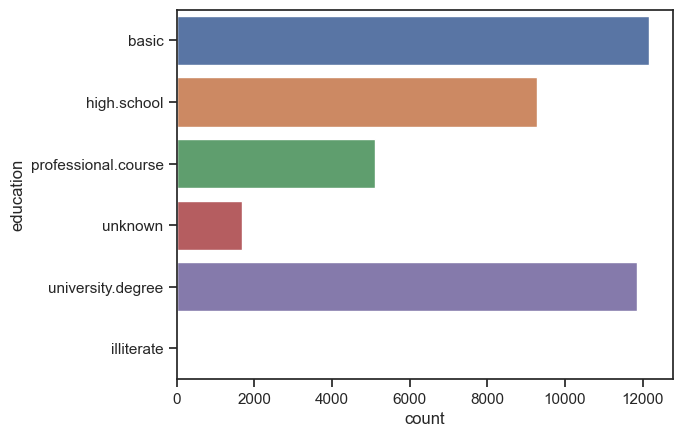

In [12]:
sns.countplot(y="education", data=df)

In [13]:
df.education.value_counts()

education
basic                  12166
university.degree      11860
high.school             9281
professional.course     5112
unknown                 1682
illiterate                18
Name: count, dtype: int64

In [14]:
# Eliminamos los valores correspondientes a 'iliterate' ya que no representan un gran porcentaje de nuestro conjunto de datos:
# df = df[df.education != "illiterate"]

<Axes: xlabel='count', ylabel='housing'>

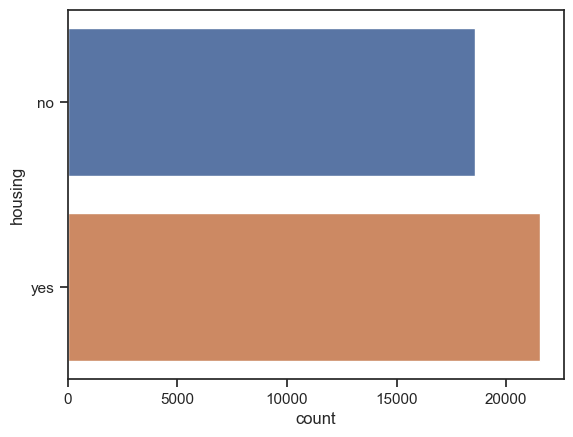

In [15]:
sns.countplot(y="housing", data=df)

<Axes: xlabel='count', ylabel='y'>

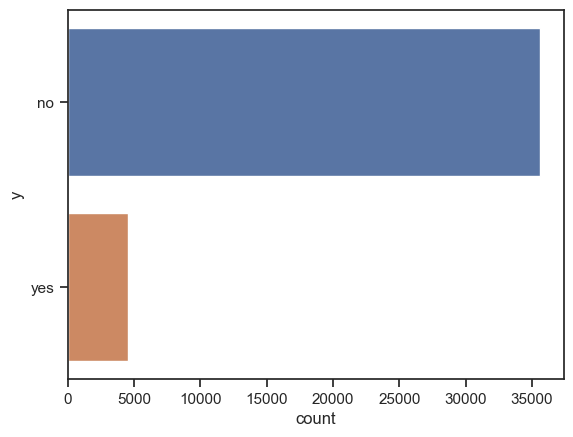

In [16]:
sns.countplot(y="y", data=df)

Ahora, para deducir los valores que faltan en "job" y "education", utilizamos la tabulación cruzada entre "job" y "education". Nuestra hipótesis es que "job" está influido por "education" de una persona. Por lo tanto, podemos deducir que "job" está en función de la educación de la persona. Además, como sólo estamos rellenando los valores que faltan, no nos preocupa mucho la inferencia causal. Por lo tanto, podemos utilizar el tipó de trabajo de la persona para predecir la educación.

In [17]:
# Creamos una tabla cruzada que toma el recuento de cada categoría que coincide con cada una de ellas (feat_1 y feat_2):
def cross_tab(df, feat_1, feat_2):
    jobs = list(df[feat_1].unique())
    edu = list(df[feat_2].unique())
    dataframes = []
    for e in edu:
        dfe = df[df[feat_2] == e]
        dfejob = dfe.groupby(feat_1).count()[feat_2]
        dataframes.append(dfejob)
    xx = pd.concat(dataframes, axis=1)
    xx.columns = edu
    xx = xx.fillna(0)
    return xx

In [18]:
cross_tab(df, "job", "education")

,basic,high.school,professional.course,unknown,university.degree,illiterate
job,,,,,,
admin.,713,3245,355,244,5623,1.0
blue-collar,7159,858,443,441,92,8.0
entrepreneur,408,227,129,57,594,2.0
housemaid,624,170,59,41,133,1.0
management,343,291,85,122,2009,0.0
retired,794,267,235,94,278,3.0
self-employed,324,117,160,27,745,3.0
services,723,2616,213,146,164,0.0
student,132,349,42,163,165,0.0


In [19]:
df["job"][df["age"] > 60].value_counts()

job
retired          659
housemaid         52
admin.            47
technician        33
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: count, dtype: int64

**Inferir la educación a partir de los puestos de trabajo**: de la tabulación cruzada vemos que las personas con puestos directivos suelen tener un título universitario. Por lo tanto, siempre que "job" = 'management' y "education" = 'unknown', podemos sustituir "education" por "university.degree". Del mismo modo, "job" = "services" --> "education" = "high.school" y "job" = "housemaid" --> "education" = "basic".

**Inferir empleos a partir de la educación**: si 'education' = 'basic' (generalizamos basic.4y', 'basic.6y' y 'basic.9y' a 'basic' previamente) entonces 'job' suele ser 'blue-collar'. Si 'education' = 'professional.course', entonces 'job' = 'technician'.

**Inferir empleos a partir de la edad**: como podemos ver, si "age" > 60 años, "job" es "retired", lo que tiene sentido.

Al imputar los valores de job y education, tuvimos en cuenta que las correlaciones debían tener sentido en el mundo real. Si no lo tenían, no sustituíamos los valores que faltaban.

### Imputación de valores:

In [20]:
df.loc[(df["age"] > 60) & (df["job"] == "unknown"), "job"] = "retired"
df.loc[
    (df["education"] == "unknown") & (df["job"] == "management"), "education"
] = "university.degree"
df.loc[
    (df["education"] == "unknown") & (df["job"] == "services"), "education"
] = "high.school"
df.loc[
    (df["education"] == "unknown") & (df["job"] == "housemaid"), "education"
] = "basic"
df.loc[(df["job"] == "unknown") & (df["education"] == "basic"), "job"] = "blue-collar"
df.loc[
    (df["job"] == "unknown") & (df["education"] == "professional.course"), "job"
] = "technician"

In [21]:
cross_tab(df, "job", "education")

,basic,high.school,professional.course,unknown,university.degree,illiterate
job,,,,,,
admin.,713.0,3245,355.0,244.0,5623,1.0
blue-collar,7259.0,858,443.0,441.0,92,8.0
entrepreneur,408.0,227,129.0,57.0,594,2.0
housemaid,665.0,170,59.0,0.0,133,1.0
management,343.0,291,85.0,0.0,2131,0.0
retired,798.0,267,237.0,108.0,279,3.0
self-employed,324.0,117,160.0,27.0,745,3.0
services,723.0,2762,213.0,0.0,164,0.0
student,132.0,349,42.0,163.0,165,0.0


De esta forma hemos podido deducir los valores que faltaban en "job" y "education", reduciendo así el número de valores faltantes.

### Variables numéricas:

In [22]:
def drawhist(df, feature):
    plt.hist(df[feature])

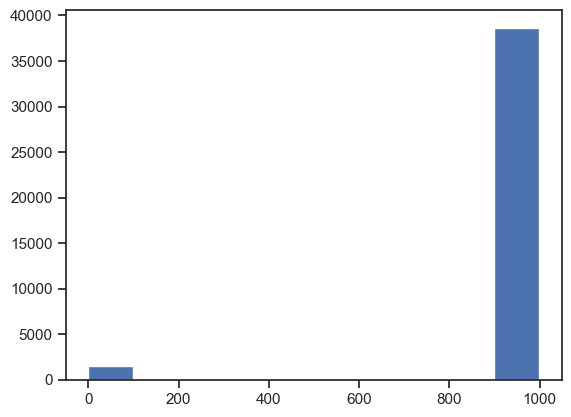

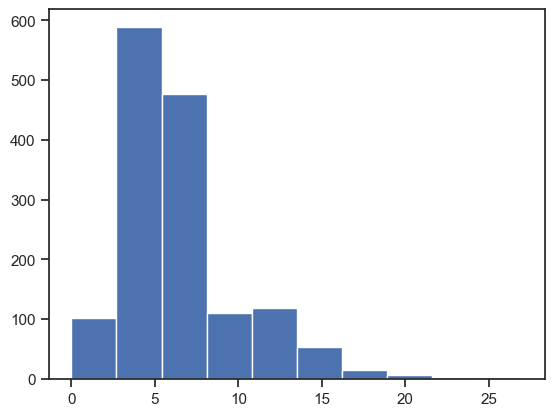

In [23]:
drawhist(df, "pdays")
plt.show()

plt.hist(df.loc[df.pdays != 999, "pdays"])
plt.show()

In [24]:
df["campaign"].value_counts()

campaign
1     17191
2     10288
3      5197
4      2583
5      1569
6       956
7       612
8       390
9       272
10      216
11      176
12      120
13       87
14       66
17       57
16       49
15       49
18       32
20       30
19       25
21       22
22       17
23       16
24       15
27       11
29       10
25        8
28        8
26        8
31        7
30        7
35        5
33        4
32        4
34        3
42        2
40        2
43        2
41        1
37        1
39        1
Name: count, dtype: int64

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000
mean,40.025649,258.384855,2.566540,962.467210,0.172462,0.081665,93.574366,-40.507376,3.621063,5167.067724
std,10.421783,259.328590,2.762957,186.932089,0.493937,1.570349,0.578081,4.628831,1.734155,72.232576
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Missing values:** de la fuente de los datos (U.C. Irvine ML Repository), sabemos que los valores que faltan, o NaN's, se codifican como '999'. De la tabla anterior se desprende que sólo "pdays" tiene valores perdidos. Además, faltan la mayoría de los valores de "pdays".

**Outliers:** Los valores atípicos se definen como *1.5 x Q3* (percentil 75). De la tabla anterior se desprende que sólo "age" y "campaign" tienen valores atípicos, ya que max("age") y max("campaign") > *1.5 x Q3("age")* y, *> 1.5 x Q3("campaign")* respectivamente.

Observamos que el valor de estos *ourtliers* no es tan irreal (max('age')=98 y max('campaign')=43). Por lo tanto, no es necesario eliminarlos, ya que el modelo de predicción debe representar el mundo real. Esto mejora la generalizabilidad del modelo y lo hace robusto para situaciones del mundo real. Por lo tanto, los valores atípicos no se eliminan.

#### Missing values:

In [27]:
(((df["pdays"].value_counts()) / len(df)) * 100).round(2)

pdays
999    96.32
3       1.07
6       1.00
4       0.28
9       0.15
2       0.15
7       0.14
12      0.14
10      0.12
5       0.11
13      0.09
11      0.07
1       0.06
15      0.06
14      0.05
8       0.04
0       0.04
16      0.02
17      0.02
18      0.02
22      0.01
19      0.01
21      0.00
25      0.00
26      0.00
27      0.00
20      0.00
Name: count, dtype: float64

In [29]:
# Eliminamos dicha columna:

## Enconding varibles categóricas

In [30]:
categorize(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,3,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,3,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,4,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,3,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')